In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
#Import merged dataset 
csv_path = "drought_census_2010_2019.csv"
df = pd.read_csv(csv_path)
df = pd.DataFrame(df)
df.head()

,Unnamed: 0,Year,County,None,D0,D1,D2,D3,D4,Unnamed: 0.1,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,58,2010,Alameda County,84.000192,15.999808,2.624615,0.000000,0.0,0.0,35.0,1477980.0,36.2,69384.0,33961.0,165417.0,11.192100
1,59,2010,Alpine County,87.179423,12.820577,1.116154,0.000000,0.0,0.0,36.0,1176.0,40.9,63478.0,32159.0,145.0,12.329932
2,60,2010,Amador County,92.307692,7.692308,0.000000,0.000000,0.0,0.0,37.0,38327.0,47.2,54758.0,26329.0,2720.0,7.096825
3,61,2010,Butte County,70.173462,29.826538,6.780385,0.676346,0.0,0.0,38.0,218635.0,37.2,43170.0,23404.0,39290.0,17.970590
4,62,2010,Calaveras County,93.010000,6.990000,0.000000,0.000000,0.0,0.0,39.0,45994.0,48.5,54971.0,28408.0,3773.0,8.203244


In [4]:
min = df['Household Income'].min()
max = df['Household Income'].max()
print(f'Min: {min}, Max: {max}')

Min: 34588.0, Max: 124055.0


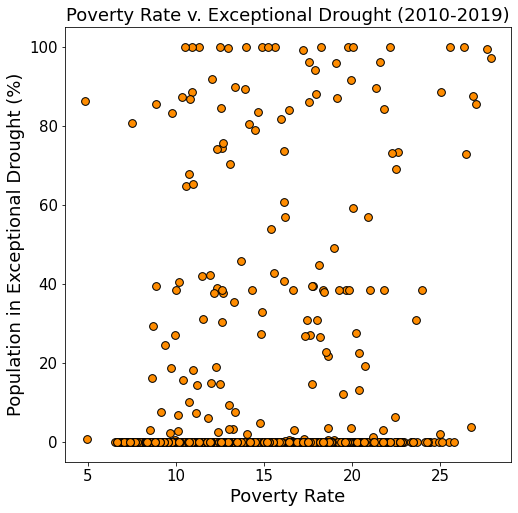

In [5]:
# Create a scatterplot for poverty rate v. D4 

#Define variables
x = df['Poverty Rate']
y = df['D4']

#Plot data
plt.figure(figsize=(8,8))
plt.title("Poverty Rate v. Exceptional Drought (2010-2019)", fontsize = '18')
plt.xlabel("Poverty Rate", fontsize = '18')
plt.ylabel("Population in Exceptional Drought (%)", fontsize = '18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cap_plot = plt.scatter(x,y, marker="o", color="darkorange",edgecolors="black",s=60)

plt.savefig('D4_PovertyRate.png')

plt.show()

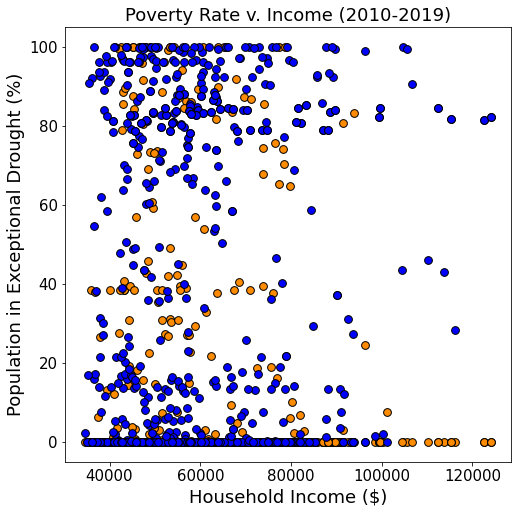

In [7]:
# Create a scatterplot for income v. D4 

#Define variables
x = df['Household Income']
y = df['D4']
yn = df['None']

#Plot data
plt.figure(figsize=(8,8))
plt.title("Poverty Rate v. Income (2010-2019)", fontsize = '18')
plt.xlabel("Household Income ($)", fontsize = '18')
plt.ylabel("Population in Exceptional Drought (%)", fontsize = '18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

cap_plot = plt.scatter(x,y, marker="o", color="darkorange",edgecolors="black",s=60)
cap_plot = plt.scatter(x,yn, marker="o", color="blue",edgecolors="black",s=60)

plt.savefig('D4_PovertyRate.png')

plt.show()

In [41]:
bins = [0,35000,55000,75000,95000,115000,135000]
labels = ["<$35,000", "$35,000-$55,000","$55,000-$75,000","$75,000-$95,000","$95,000-$115,000","$115,000-$135,000"]
df["Income"] = pd.cut(df['Household Income'],bins, labels=labels, include_lowest=True)

In [42]:
df_grouped = df.groupby(df["Income"]).mean()
df_grouped.head()

,Unnamed: 0,Year,None,D0,D1,D2,D3,D4,Unnamed: 0.1,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
Income,,,,,,,,,,,,,,,
"<$35,000",241.000000,2012.500000,1.184904,98.815096,92.669712,66.545000,5.734327,0.000000,12.000000,1.148900e+04,47.850000,34781.000000,21755.500000,2135.500000,18.475411
"$35,000-$55,000",347.865132,2014.483553,38.622659,61.377341,49.291387,35.152141,23.181881,13.452032,29.092105,2.113779e+05,39.599013,46396.657895,23274.460526,43462.506579,18.224050
"$55,000-$75,000",380.774336,2014.946903,45.669414,54.330586,40.267793,29.267590,18.695769,10.531760,26.964602,1.072495e+06,38.220796,63225.000000,30529.938053,162182.867257,13.211306
"$75,000-$95,000",420.012195,2015.548780,40.558443,59.441557,41.002358,29.970700,18.811583,9.972237,30.439024,1.074673e+06,38.950000,83420.475610,40966.939024,114031.195122,9.761175
"$95,000-$115,000",530.764706,2017.588235,60.441125,39.558875,15.764837,12.586742,8.498133,1.905158,25.647059,1.047722e+06,39.711765,103613.058824,55988.352941,95710.235294,8.899072


In [43]:
#Make lists for stacked bar chart
x_axis = df['Income']
none = df['None']
d0 = df['D0']
d1 = df['D1']
d2 = df['D2']
d3 = df['D3']
d4 = df['D4']

In [45]:
plot_df = df_grouped[["None","D0","D1","D2","D3","D4"]]
plot_df.reset_index()
plot_df.head()

,None,D0,D1,D2,D3,D4
Income,,,,,,
"<$35,000",1.184904,98.815096,92.669712,66.545000,5.734327,0.000000
"$35,000-$55,000",38.622659,61.377341,49.291387,35.152141,23.181881,13.452032
"$55,000-$75,000",45.669414,54.330586,40.267793,29.267590,18.695769,10.531760
"$75,000-$95,000",40.558443,59.441557,41.002358,29.970700,18.811583,9.972237
"$95,000-$115,000",60.441125,39.558875,15.764837,12.586742,8.498133,1.905158


In [53]:
# plot grouped bar chart
plot_df.plot(x='Income',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')

KeyError: 'Income'